
# Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification)


1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat unitl satisfied


## 1. Import and become one with data

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2022-02-08 15:16:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  97.7MB/s    in 5.7s    

2022-02-08 15:16:44 (86.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

# Walk through 10 classes of food image data

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' . ") 

There are 2 directories and 0 images in '10_food_classes_all_data' . 
There are 10 directories and 0 images in '10_food_classes_all_data/test' . 
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice' . 
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi' . 
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza' . 
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen' . 
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry' . 
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger' . 
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon' . 
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream' . 
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings' . 
There are 0 directories and 250 images in '10_food_classes_all_data/t

In [3]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 Feb  8 15:16 .
drwxr-xr-x  1 root root 4096 Feb  8 15:16 ..
drwxr-xr-x 12 root root 4096 Feb  8 15:16 test
drwxr-xr-x 12 root root 4096 Feb  8 15:16 train


In [4]:
import tensorflow as tf

In [5]:
# Setup the train and test directories

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"


In [6]:
# Let's get the the class names

import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [7]:
def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)

  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  # Read in the image and plot it using matplotlib

  img = mpimg.imread(target_folder + "/" +random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

['978988.jpg']
Image shape: (511, 512, 3)


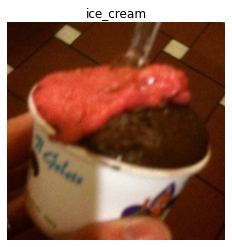

In [8]:
# Get the subdirectoreis (thess are our class names) Using imagegnerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

### 2. Preprocess the data (prepare it for model)



In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)


IMG_SIZE = (224,224)
# Load data in from directories and turn it into batches

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size = 32,
                                               class_mode = "categorical")


test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = "categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

We've talked about CNN Explainer website...

how about we just take their model (also on 10 classes) and use it for our problem?

In [10]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Activation
from tensorflow.keras import Sequential

In [11]:
model_1 = Sequential([
                      Conv2D(10,3,activation = "relu",input_shape = (224,224,3)),
                      # Activation(activation = "relu")
                      Conv2D(10,3,activation = "relu"),
                      MaxPool2D(),
                      Conv2D(10,3,activation="relu"),
                      Conv2D(10,3,activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(10,activation = "softmax") # Changed to have 10 output neurons and use the softmax activation function
                      # Activation(activation = "softmax")
                      
                               
])




In [12]:
model_1.compile(loss = "categorical_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])



### 4. Fit the model

In [13]:
history_1 = model_1.fit(train_data, # now 10 different classes
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data)) # adding int(0.25 * len(test_data)) will accelerate the fitting speed because will go thorugh 25% of test dataset.


Epoch 1/5
235/235 [==============================] - 89s 330ms/step - loss: 2.1659 - accuracy: 0.1955 - val_loss: 2.0285 - val_accuracy: 0.2760
Epoch 2/5
235/235 [==============================] - 91s 389ms/step - loss: 1.9771 - accuracy: 0.2969 - val_loss: 1.8919 - val_accuracy: 0.3536
Epoch 3/5
235/235 [==============================] - 87s 372ms/step - loss: 1.7054 - accuracy: 0.4177 - val_loss: 1.8919 - val_accuracy: 0.3392
Epoch 4/5
235/235 [==============================] - 84s 359ms/step - loss: 1.2564 - accuracy: 0.5775 - val_loss: 2.1268 - val_accuracy: 0.3160
Epoch 5/5
235/235 [==============================] - 83s 354ms/step - loss: 0.7020 - accuracy: 0.7756 - val_loss: 2.6173 - val_accuracy: 0.3188


### 5. Evaluate the model

In [14]:
# Evaluate on the test data

model_1.evaluate(test_data)

79/79 [==============================] - 19s 245ms/step - loss: 2.6173 - accuracy: 0.3188


[2.6173086166381836, 0.3188000023365021]

In [15]:
# Plot the validation and training curves separately

def plot_loss_curves(history):
  """
  Returns separateloss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # How many epochs 

  # Plot loss

  plt.plot(epochs,loss, label = "training_loss")
  plt.plot(epochs, val_loss,label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot Accuracy
  plt.figure()
  plt.plot(epochs,accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy,label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

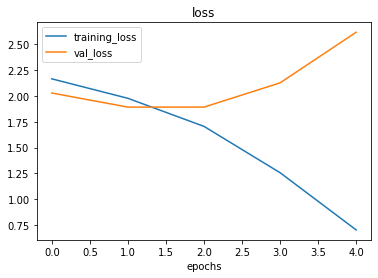

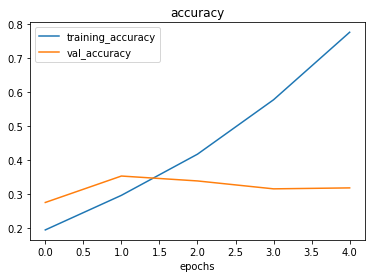

In [16]:

# Check out the model's loss curves

plot_loss_curves(history_1)

What do these loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting great  results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset

### 6. Adjust the model hyperparameters ( to beat the baseline/ reduce overfitting)


Due to its performance on the training data,  it's claer our model is learning something...

However, iut's not generalizing well to unseen data (overfitting).

So, let's try and fix overfitting by...
* **Get more data** - having more data gives a model more opportunint to learn diverse patterns...

* **Simply the  model** - if our current model is overfitting the data, it may ve too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # of hidden units in layers


* **Use data augmentation** - data augmenation manipulates the training data in usch a way to add more diversity to it (without altering the original data)

* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to our own and allows us to use those patterns on our own dataset.

In [22]:
# How about we try and simplify the model first?


# Let's try to remove 2 convolutional layers...


model_2 = Sequential([
                      Conv2D(10,3,activation = "relu", input_shape = (224,224,3)),
                      MaxPool2D(),
                      Conv2D(10,3,activation = "relu"),
                      MaxPool2D(),
                      Flatten( ),
                      Dense(10,activation ="softmax")
])

model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])



In [23]:
# Fit the model with 2x conv layers removed

history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 81s 340ms/step - loss: 2.1629 - accuracy: 0.2169 - val_loss: 1.9852 - val_accuracy: 0.3012
Epoch 2/5
235/235 [==============================] - 78s 332ms/step - loss: 1.7587 - accuracy: 0.4049 - val_loss: 1.9151 - val_accuracy: 0.3264
Epoch 3/5
235/235 [==============================] - 77s 329ms/step - loss: 1.2791 - accuracy: 0.5831 - val_loss: 2.0076 - val_accuracy: 0.3336
Epoch 4/5
235/235 [==============================] - 61s 259ms/step - loss: 0.7438 - accuracy: 0.7789 - val_loss: 2.3429 - val_accuracy: 0.2988
Epoch 5/5
235/235 [==============================] - 72s 308ms/step - loss: 0.3538 - accuracy: 0.9113 - val_loss: 2.7713 - val_accuracy: 0.3064


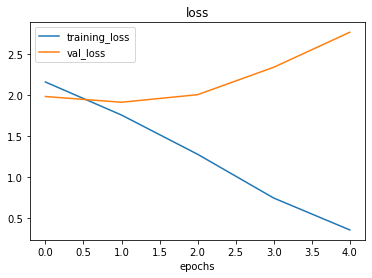

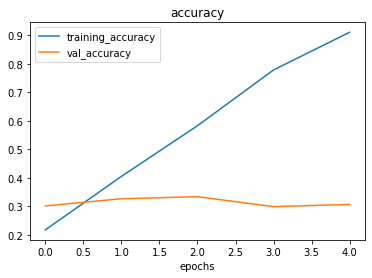

In [24]:
# Check out the loss curves of model_2

plot_loss_curves(history_2)

Looks like our "simplifying the model" experiment doesn't work

* the accruacy went down and overfitting continued

How about we try data augmentation???b

### Trying to redcue overfitting with data augmentaion


Let's try and improve our model's reults by using augmented training data...

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [35]:
# Create an augmented data generator in ImageDataGenerator

train_datagen_augmented = ImageDataGenerator(rescale = 1/255,
                                             rotation_range =0.2,
                                             width_shift_range=0.2, 
                                             height_shift_range= 0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip = True)


train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size = (224,224),
                                                                   batch_size = 32,
                                                                  class_mode = "categorical")

Found 7500 images belonging to 10 classes.


In [36]:
# Let's create another model but this time we'll fit it on the augmented train data

model_3 = tf.keras.models.clone_model(model_1)

# Compile the cloned model (using the same setup as previous models)

model_3.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])



In [38]:
# Fit the model

history_3 = model_3.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 146s 617ms/step - loss: 2.3018 - accuracy: 0.1041 - val_loss: 2.2958 - val_accuracy: 0.1388
Epoch 2/5
235/235 [==============================] - 161s 686ms/step - loss: 2.2838 - accuracy: 0.1419 - val_loss: 2.2785 - val_accuracy: 0.1516
Epoch 3/5
235/235 [==============================] - 133s 567ms/step - loss: 2.2790 - accuracy: 0.1531 - val_loss: 2.2752 - val_accuracy: 0.1552
Epoch 4/5
235/235 [==============================] - 147s 626ms/step - loss: 2.2674 - accuracy: 0.1560 - val_loss: 2.2753 - val_accuracy: 0.1480
Epoch 5/5
235/235 [==============================] - 141s 598ms/step - loss: 2.2433 - accuracy: 0.1747 - val_loss: 2.2574 - val_accuracy: 0.1664


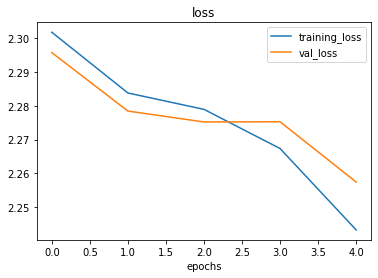

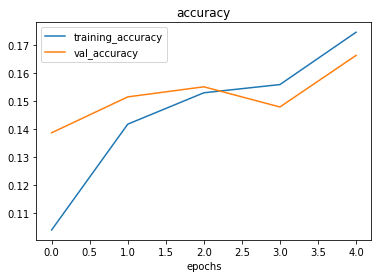

In [39]:
# Check our model trained on augmented data's loss curves

plot_loss_curves(history_3)

That looks much better, the loss curves are much closer to each other than the baseline model and they look like
they're heading in the right direction(certainly not the wrong direction) so if we were to train for longer, we might see further improvement

### 7. Repeat unitl satisfied

We could keep going here... continually trying to bring loss curves closer together and  trying to improve the valdiation/test accuracy.

How?


By running lots of experiments, namely:

- restructuring our model's architecture (increasing layers/ hidden units)
- adjust the learning rate
- try different methods of data augmentaion (adjust the hyperparameters in our ImageDataGenerator instance)
- training for longer (e.g. 10 epohcs instead of 5)
- try **transfer learning**

### Making a prediction with our trained model

Let's our trained model to make some predictions on our own custom images!

In [40]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [42]:
# Download some custom images

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2022-02-08 15:48:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2022-02-08 15:48:28 (27.5 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]

--2022-02-08 15:48:29--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting respons

### Adjust and reconfig pred_and_plot function to work with multi-class images

In [43]:
# Create a function to import and image and resize it to be able to be used with our model 

def load_and_prep_image(filename,img_shape = 224):

  """
  Reads an image from filenae, turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channels).
  """

  # Read in the image
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor
  # our model is trained on images with 3 colour channels and someimes images have 4 colour channels
  img = tf.image.decode_image(img,channels  = 3)

  # Resize the image
  img = tf.image.resize(img,size = [img_shape,img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.

  return img

In [52]:
def pred_and_plot(model,filename,class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title.
  """
  
  # Import the target image and preprocess it

  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img,axis = 0))


  # Add in logic for multi-class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
  
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)


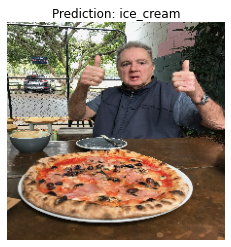

In [53]:
pred_and_plot(model = model_3,
              filename = "03-pizza-dad.jpeg",
              class_names = class_names)

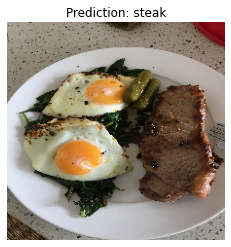

In [56]:
pred_and_plot(model = model_3,
              filename = "03-steak.jpeg",
              class_names = class_names)

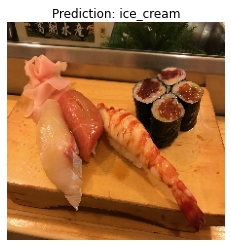

In [59]:
pred_and_plot(model = model_3,
              filename = "03-sushi.jpeg",
              class_names = class_names)

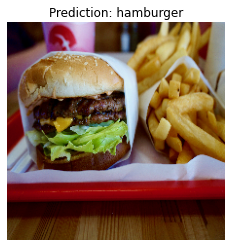

In [62]:
pred_and_plot(model = model_3,
              filename = "03-hamburger.jpeg",
              class_names = class_names)

Looks like our model didn't perform very well on our custom images but this because it only achiecved ~39% accuracy on the test data. So we can expect it to functino quite poorly on other unseen data

## Saving and Loading our model

In [63]:
# Save a model

model_3.save("saved_trained_model_3")

INFO:tensorflow:Assets written to: saved_trained_model_3/assets


In [64]:
# Load in a trained model and evaluate it

loaded_model_3 = tf.keras.models.load_model("saved_trained_model_3")
loaded_model_3.evaluate(test_data)

79/79 [==============================] - 18s 224ms/step - loss: 2.2574 - accuracy: 0.1664


[2.2574470043182373, 0.1664000004529953]

In [65]:
# Compare our loaded model to our existing model

model_3.evaluate(test_data)

79/79 [==============================] - 14s 181ms/step - loss: 2.2574 - accuracy: 0.1664


[2.257446765899658, 0.1664000004529953]